In [1]:
import h5py
import scipy.io as io
import PIL.Image as Image
import numpy as np
import os
import glob
from matplotlib import pyplot as plt
from scipy.ndimage.filters import gaussian_filter
import scipy
from scipy import spatial
import json
from matplotlib import cm as CM
%matplotlib inline

In [2]:
#this is borrowed from https://github.com/davideverona/deep-crowd-counting_crowdnet
def gaussian_filter_density(gt):
    print(gt.shape)
    density = np.zeros(gt.shape, dtype=np.float32)
    gt_count = np.count_nonzero(gt)
    if gt_count == 0:
        return density
    
    # pts = np.array(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    pts = list(zip(np.nonzero(gt)[1], np.nonzero(gt)[0]))
    leafsize = 2048
    # build kdtree
    tree = scipy.spatial.KDTree(pts.copy(), leafsize=leafsize)
    # query kdtree
    distances, locations = tree.query(pts, k=4)
    
    print("[INFO]Generate density...")
    for i, pt in enumerate(pts):
        pt2d = np.zeros(gt.shape, dtype=np.float32)
        pt2d[pt[1], pt[0]] = 1.0
        if gt_count > 1:
            sigma = (distances[i][1] + distances[i][2] + distances[i][3]) * 0.1
        else:
            sigma = np.average(np.array(gt.shape))/2.0/2.0 # case: 1 point
        density += scipy.ndimage.filters.gaussian_filter(pt2d, sigma, mode="constant")
    print("[INFO]Done")
    return density

In [3]:
# generate ground truth
part_A_train = 'datasets/part_A/train_data/images'
part_A_test = 'datasets/part_A/test_data/images'
part_B_train = 'datasets/part_B/train_data/images'
part_B_test = 'datasets/part_B/test_data/images'
path_sets = [part_A_train, part_A_test]

In [4]:
img_paths = []
for path in path_sets:
    for img_path in glob.glob(os.path.join(path, "*.jpg")):
        img_paths.append(img_path)

In [5]:
img_paths[:5]

['datasets/part_A/train_data/images/IMG_265.jpg',
 'datasets/part_A/train_data/images/IMG_62.jpg',
 'datasets/part_A/train_data/images/IMG_212.jpg',
 'datasets/part_A/train_data/images/IMG_260.jpg',
 'datasets/part_A/train_data/images/IMG_98.jpg']

In [45]:
for img_path in img_paths:
    print(img_path)
    mat = io.loadmat(img_path.replace(".jpg", ".mat").replace("images", "ground_truth").replace("IMG_", "GT_IMG_"))
    img = plt.imread(img_path)
    k = np.zeros((img.shape[0], img.shape[1]))
    gt = mat["image_info"][0, 0][0, 0][0]
    for i in range(0, len(gt)):
        if int(gt[i][1]) < img.shape[0] and int(gt[i][0]) < img.shape[1]:
            k[int(gt[i][1]), int(gt[i][0])] = 1
    k = gaussian_filter_density(k)
    with h5py.File(img_path.replace(".jpg", ".h5").replace("images", "ground_truth"), "w") as hf:
        hf["density"] = k

datasets/part_A/train_data/images/IMG_265.jpg
(464, 370)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_62.jpg
(340, 620)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_212.jpg
(688, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_260.jpg
(681, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_98.jpg
(512, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_195.jpg
(665, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_184.jpg
(617, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_199.jpg
(505, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_279.jpg
(294, 488)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_87.jpg
(416, 620)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_139.jpg
(370, 545)


[INFO]Done
datasets/part_A/train_data/images/IMG_23.jpg
(800, 600)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_204.jpg
(695, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_233.jpg
(768, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_267.jpg
(521, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_259.jpg
(338, 506)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_157.jpg
(450, 299)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_251.jpg
(661, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_181.jpg
(639, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_80.jpg
(426, 634)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_269.jpg
(400, 600)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_245.jpg


[INFO]Done
datasets/part_A/train_data/images/IMG_96.jpg
(530, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_164.jpg
(462, 650)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_47.jpg
(662, 962)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_268.jpg
(600, 900)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_83.jpg
(683, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_149.jpg
(683, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_89.jpg
(410, 563)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_174.jpg
(512, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_103.jpg
(400, 400)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_263.jpg
(453, 680)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_86.jpg
(387

[INFO]Done
datasets/part_A/train_data/images/IMG_242.jpg
(667, 1000)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_226.jpg
(615, 922)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_247.jpg
(681, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_25.jpg
(768, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_109.jpg
(681, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_1.jpg
(768, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_216.jpg
(293, 442)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_14.jpg
(645, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_188.jpg
(649, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_60.jpg
(768, 1024)
[INFO]Generate density...
[INFO]Done
datasets/part_A/train_data/images/IMG_167.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/part_A/test_data/ground_truth/GT_IMG_62.mat'

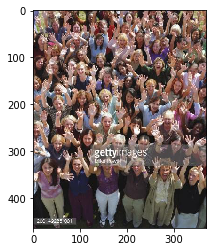

In [50]:
# check sample
plt.imshow(Image.open(img_paths[0]))

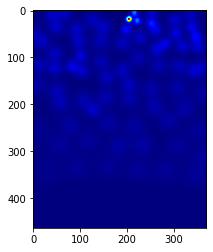

In [51]:
gt_file = h5py.File(img_paths[0].replace(".jpg", ".h5").replace("images", "ground_truth"), "r")
groundtruth = np.asarray(gt_file["density"])
plt.imshow(groundtruth, cmap=CM.jet)

In [48]:
np.sum(groundtruth)

70.13935

In [49]:
groundtruth

array([[2.8650250e-06, 3.4686616e-06, 4.2694519e-06, ..., 1.3433930e-05,
        1.0321946e-05, 7.8687171e-06],
       [3.3973588e-06, 4.0468103e-06, 4.9061591e-06, ..., 1.4251754e-05,
        1.0950171e-05, 8.3475288e-06],
       [4.0427390e-06, 4.7358617e-06, 5.6500562e-06, ..., 1.5000154e-05,
        1.1525117e-05, 8.7857670e-06],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

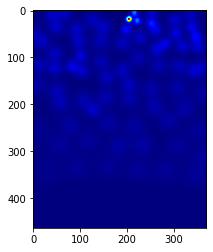

In [7]:
gt_file = h5py.File(img_paths[0].replace(".jpg", ".h5").replace("images", "ground_truth"), "r")
groundtruth = np.asarray(gt_file["density"])
plt.imshow(groundtruth, cmap=CM.jet)

In [8]:
np.sum(groundtruth)

70.13935